In [1]:
import os, sys, glob
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import patches
import lightkurve as lk
from astropy.io import fits
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, match_coordinates_3d
from astropy.stats import sigma_clip

%matplotlib inline
path = os.path.dirname(os.getcwd()) 

sys.path.append('%s/Work/BAERI/ADAP/psfmachine/' % os.environ['HOME'])
from psfmachine import Machine
from psfmachine.utils import get_gaia_sources

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
exba = fits.open(f'{path}/data/EXBA/53/5/kplr100002059-2010174085026_lpd-targ.fits.gz')

In [6]:
exba.info()

Filename: /Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/EXBA/53/5/kplr100002059-2010174085026_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1  TARGETTABLES    1 BinTableHDU    287   4634R x 13C   [D, E, J, 540J, 540E, 540E, 540E, 540E, 540E, J, E, E, 300E]   
  2  APERTURE      1 ImageHDU        48   (9, 60)   int32   


In [7]:
tpfs_paths = np.sort(glob.glob(f'{path}/data/EXBA/53/5/*2010174085026_lpd-targ.fits.gz'))
len(tpfs_paths)

4

In [9]:
tpfs_paths

array(['/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/EXBA/53/5/kplr100002059-2010174085026_lpd-targ.fits.gz',
       '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/EXBA/53/5/kplr100002060-2010174085026_lpd-targ.fits.gz',
       '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/EXBA/53/5/kplr100002061-2010174085026_lpd-targ.fits.gz',
       '/Users/jorgemarpa/Work/BAERI/ADAP/EXBA_pathfinder/data/EXBA/53/5/kplr100002062-2010174085026_lpd-targ.fits.gz'],
      dtype='<U109')

In [10]:
tpfs = lk.TargetPixelFileCollection([lk.KeplerTargetPixelFile(f) for f in tpfs_paths[:4]])

In [11]:
tpfs[0].get_header()

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-18'         / file creation date.                            
CREATOR = '885387 TargetPixelExporterPipelineModule' / pipeline job and program 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.23 r60353' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

<AxesSubplot:title={'center':'Target ID: 100002059, Cadence: 16373'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

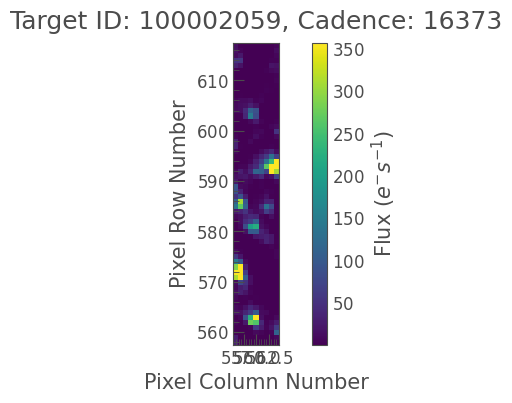

In [12]:
tpfs[0].plot()

In [194]:
tpfs[0].time.jd

array([2455276.49050776, 2455276.51094189, 2455276.53137583, ...,
       2455371.10077876, 2455371.12121295, 2455371.16208102])

In [178]:
channels = [tpf.get_header()['CHANNEL']for tpf in tpfs]
quarters = [tpf.get_header()['QUARTER']for tpf in tpfs]
target_ids = [tpf.get_header()['OBJECT']for tpf in tpfs]
ra_objects = [tpf.get_header()['RA_OBJ']for tpf in tpfs]
dec_objects = [tpf.get_header()['DEC_OBJ']for tpf in tpfs]

In [181]:
channels, quarters

([53, 53, 53, 53], [5, 5, 5, 5])

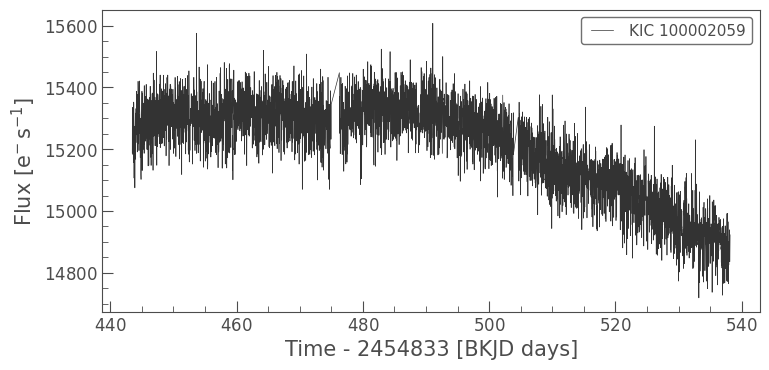

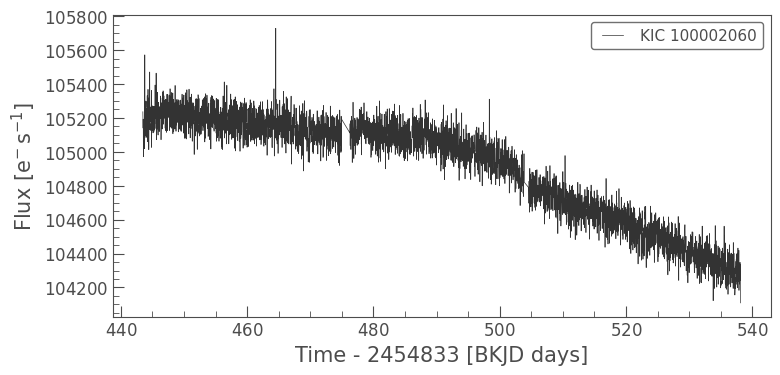

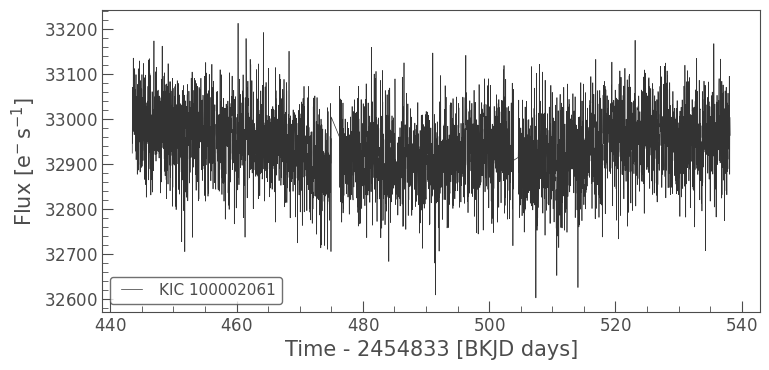

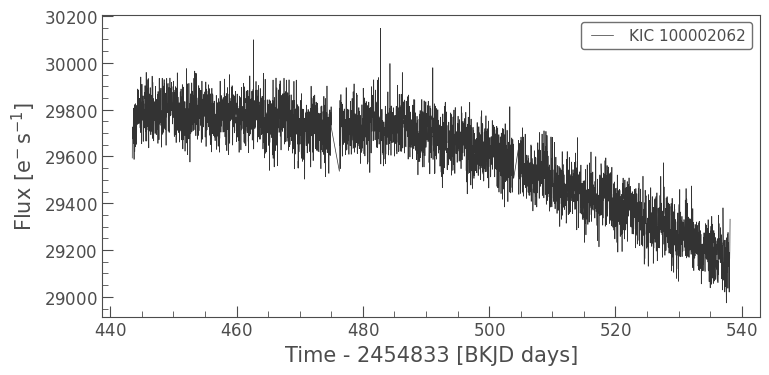

In [195]:
for tpf in tpfs:
    lc = tpf.to_lightcurve(method='aperture').remove_outliers()
    lc.plot()
    plt.show()

In [198]:
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
443.49051005030196,29593.4609375,27.434446334838867,585.9337459995718,589.7474589953883,16373,16
443.5109441844179,29726.015625,27.435611724853516,585.9364826327636,589.6739742946905,16374,144
443.5313781186487,29676.19140625,27.4341983795166,585.9409865167743,589.685847356436,16375,144
443.55181215310586,29691.9921875,27.43488883972168,585.9351672110662,589.6929851470073,16376,144
443.57224628768745,29702.400390625,27.433544158935547,585.9386635085743,589.698071535888,16377,144
443.59268022244214,29675.521484375,27.433504104614258,585.9378817223026,589.6961054474282,16378,144
443.61311425742315,29690.263671875,27.433670043945312,585.9389383964146,589.6706085766466,16379,144
443.6335483925286,29676.8671875,27.433143615722656,585.9382910060381,589.6992416277727,16380,393360


### Test PSFMachine

In [13]:
c = Machine.from_TPFs(tpfs)

/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/machine.py:799: LightkurveDeprecationWarning: The astropy_time function is deprecated and may be removed in a future version.
        Use time instead.
  times = tpfs[0].astropy_time.jd


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]
(162, 98)


/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [47]:
c.source_flux_estimates

array([[ 1410.50740221,  1410.50740221,  1410.50740221, ...,
         1410.50740221,  1410.50740221,  1410.50740221],
       [ 6090.98143593,  6090.98143593,  6090.98143593, ...,
         6090.98143593,  6090.98143593,  6090.98143593],
       [23036.67255903, 23036.67255903, 23036.67255903, ...,
        23036.67255903, 23036.67255903, 23036.67255903],
       ...,
       [10930.96475877, 10930.96475877, 10930.96475877, ...,
        10930.96475877, 10930.96475877, 10930.96475877],
       [ 1354.13857707,  1354.13857707,  1354.13857707, ...,
         1354.13857707,  1354.13857707,  1354.13857707],
       [  821.23247169,   821.23247169,   821.23247169, ...,
          821.23247169,   821.23247169,   821.23247169]])

temp_mask (47, 2160) 760


/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/machine.py:276: RuntimeWarning: divide by zero encountered in log10
  weights = (
/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/machine.py:276: RuntimeWarning: invalid value encountered in log10
  weights = (


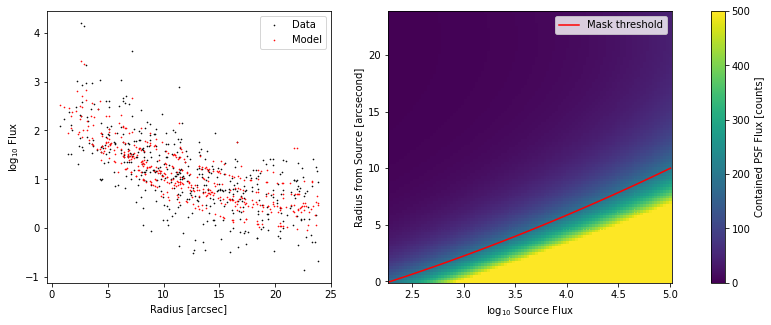

[ 0.68667732  1.25668851  1.82030269  0.57585485  1.25784372  0.81669679
  0.52438431  0.5711046   0.55270911  0.08606817  0.42758172  0.48381126
  0.16687719  0.5554017  -0.00972372  1.17836856  0.17377673  0.93143075
  0.0036603   1.59206512  0.36852945  0.17118544  0.91198859  0.57280527
  0.62587344  1.30152927  0.58713385  0.42611891  1.59019502  0.47010952
  0.65853185  1.63701112  0.10114844  0.92871596  0.33164561  0.22676868
  0.34245541  0.66074781  0.3585272   2.49954608  0.02699224  1.20435444
  0.706358    1.2971016   1.49914253  0.67153268  0.48911651]


In [50]:
c._find_psf_edge(radius_limit=(6*4), cut=200)
rad_ap = c.radius/4
print(rad_ap)

In [53]:
print(c.limit_radius)
c._get_source_mask()
c.radius/4

24.0 arcsec
0.11424083664866337


array([5.60702244, 6.67769432, 7.66042376, 5.38400043, 6.67976592,
       5.86149016, 5.27831966, 5.37430475, 5.33664818, 4.31633308,
       5.07568865, 5.19402046, 4.50256902, 5.34217102, 4.09025883,
       6.53651462, 4.51827854, 6.08035402, 4.12218627, 7.26825268,
       4.94946983, 4.51238198, 6.04361057, 5.37777731, 5.48540101,
       6.7578888 , 5.40697569, 5.07258642, 7.26501133, 5.16534891,
       5.55094369, 7.34600891, 4.35140107, 6.07523143, 4.86959099,
       4.63793455, 4.89308598, 5.55537242, 4.92788832, 8.79128305,
       4.17758238, 6.5835207 , 5.64601738, 6.74998968, 7.10657106,
       5.57689346, 5.20509415])

In [54]:
c.build_model()
psf_mean = c.mean_model.toarray()

/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<ipython-input-55-bc0c4bdc32dd>:11: RuntimeWarning: invalid value encountered in log10
  c=np.log10(img), marker='.')


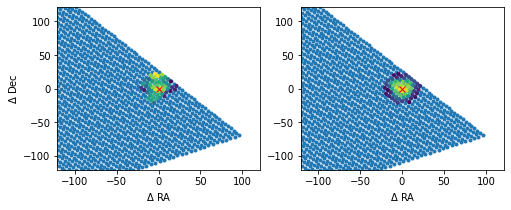

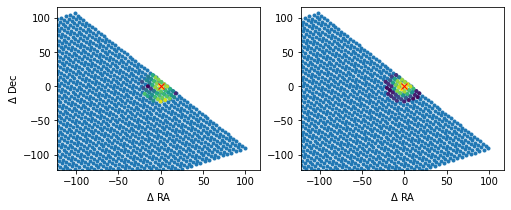

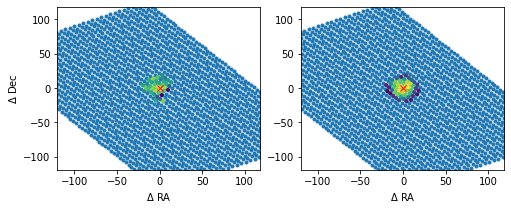

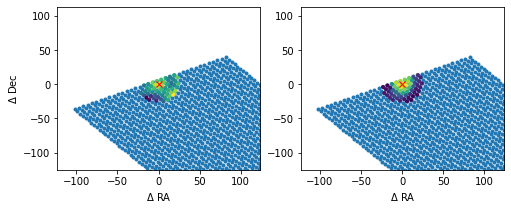

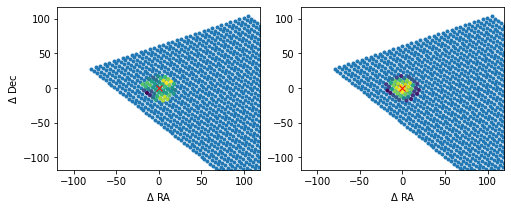

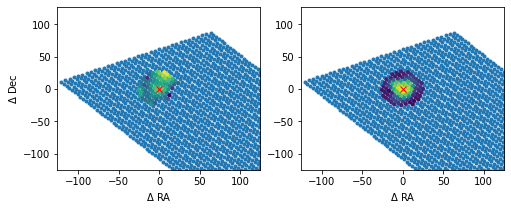

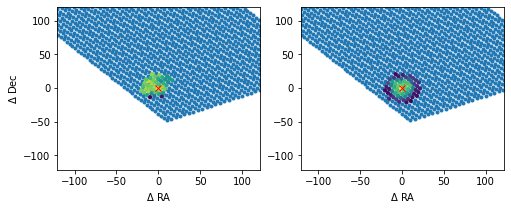

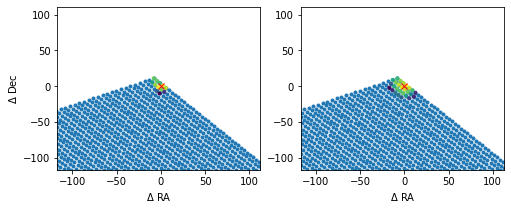

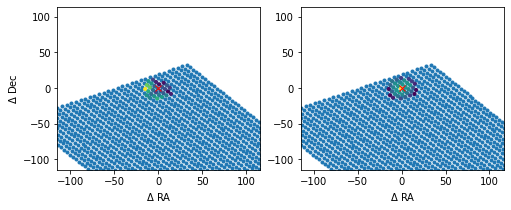

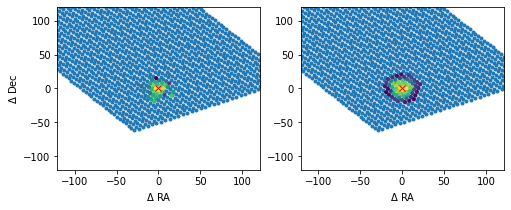

In [55]:
aux_mask = c.source_mask.toarray()
for ii in range(0, len(c.sources), 5):
    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    x = c.dra[ii].to('arcsec').value
    y = c.ddec[ii].to('arcsec').value
    img = c.flux[0, aux_mask[ii]]
    psf = psf_mean[ii]
    ax[0].scatter(x, y, marker='.')
    ax[0].scatter(x[aux_mask[ii]], 
                y[aux_mask[ii]], 
                c=np.log10(img), marker='.')
    ax[0].set_xlim(x[aux_mask[ii]].min()-100, x[aux_mask[ii]].max()+100)
    ax[0].set_ylim(y[aux_mask[ii]].min()-100, y[aux_mask[ii]].max()+100)
    ax[0].plot(0,0, 'rx')
    ax[0].set_xlabel(r'$\Delta$ RA')
    ax[0].set_ylabel(r'$\Delta$ Dec')
    
    ax[1].scatter(x, y, marker='.')
    ax[1].scatter(x[aux_mask[ii]], 
                y[aux_mask[ii]], 
                c=np.log10(psf[aux_mask[ii]]), marker='.')
    ax[1].set_xlim(x[aux_mask[ii]].min()-100, x[aux_mask[ii]].max()+100)
    ax[1].set_ylim(y[aux_mask[ii]].min()-100, y[aux_mask[ii]].max()+100)
    ax[1].plot(0,0, 'rx')
    ax[1].set_xlabel(r'$\Delta$ RA')
    plt.show()
del aux_mask

## Stitch stripes into one block

In [26]:
def parse_TPFs_channel(tpfs):
    cadences = np.array([tpf.cadenceno for tpf in tpfs])
    # check if all TPFs has same cadences
    if not np.all(cadences[1:, :] - cadences[-1:, :] == 0):
        raise ValueError("All TPFs must have same time basis")
    
    # check if all tpfs are from the same channel
    channels = [tpf.get_header()['CHANNEL']for tpf in tpfs]
    if not len(set(channels)) == 1:
        raise ValueError("All TPFs must be from the same channel")
    
    # make sure tpfs are sorted by colum direction
    test = lk.TargetPixelFileCollection([
        tpfs[i] for i in np.argsort([tpf.column for tpf in tpfs])])
    
    # extract times
    times = tpfs[0].astropy_time.jd
    
    # extract row,column mesh grid
    col, row = np.hstack([np.mgrid[tpf.column : tpf.column + tpf.shape[2], 
                                   tpf.row : tpf.row + tpf.shape[1]] for tpf in tpfs])

    # extract flux vales
    flux = np.hstack([tpf.flux.transpose(1,2,0) for tpf in tpfs]).transpose(2,0,1)
    flux_err = np.hstack([tpf.flux_err.transpose(1,2,0) for tpf in tpfs]).transpose(2,0,1)
    
    # bookkeeping of tpf-pixel
    unw = np.hstack([np.ones(tpf.shape[1:], dtype=np.int)*i for i, tpf in enumerate(tpfs)])
    
    return times, row.T, col.T, flux, flux_err, unw

def convert_to_wcs(tpfs, row, col):
    ra, dec = tpfs[0].wcs.wcs_pix2world((col - tpfs[0].column).ravel(), 
                                        (row - tpfs[0].row).ravel(), 0.0)

    return ra.reshape(row.shape), dec.reshape(row.shape)

def query_gaia(ra, dec, epoch, mag_lim=20):
    ras = ra.mean()
    decs = dec.mean()
    rads = np.hypot(ra - ras.mean(), dec - decs.mean()).max() + (u.arcsecond * 10).to(u.deg).value
    sources = get_gaia_sources(
            tuple([ras]),
            tuple([decs]),
            tuple([rads]),
            magnitude_limit=mag_lim,
            epoch=Time(epoch, format="jd").jyear,
        )
    return sources

In [27]:
times, row, col, flux, flux_err, unw = parse_TPFs_channel(tpfs)
ra, dec = convert_to_wcs(tpfs, row, col)

<ipython-input-26-7ed788087d7d>:17: LightkurveDeprecationWarning: The astropy_time function is deprecated and may be removed in a future version.
        Use time instead.
  times = tpfs[0].astropy_time.jd


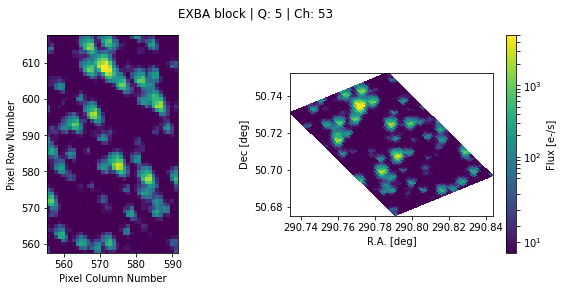

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('EXBA block | Q: %i | Ch: %i' % (tpfs[0].get_header()["QUARTER"],
                                              tpfs[0].get_header()["CHANNEL"]))
ax[0].pcolormesh(col, row, flux[0], shading='auto',
                   norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=5000, base=10))
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_xlabel('Pixel Column Number')
ax[0].set_ylabel('Pixel Row Number')

pc = ax[1].pcolormesh(ra, dec, flux[0], shading='auto',
                   norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=5000, base=10))
ax[1].set_xlabel('R.A. [deg]')
ax[1].set_ylabel('Dec [deg]')
fig.colorbar(pc, label='Flux [e-/s]')
ax[1].set_aspect('equal', adjustable='box')
plt.show()

In [29]:
def clean_source_list(sources, ra, dec):
    # find sources on the image
    inside = np.zeros(len(sources), dtype=bool)
    # max distance in arcsec from image edge to source ra, dec
    off = 6.0 / 3600
    for k in range(len(sources)):
        raok = (sources["ra"][k] > ra - off) & (sources["ra"][k] < ra + off)
        decok = (sources["dec"][k] > dec - off) & (sources["dec"][k] < dec + off)
        inside[k] = (raok & decok).any()
    del raok, decok

    # find well separated sources
    s_coords = SkyCoord(sources.ra, sources.dec, unit=("deg"))
    midx, mdist = match_coordinates_3d(s_coords, s_coords, nthneighbor=2)[:2]
    # remove sources closer than 4" = 1 pix
    closest = mdist.arcsec < 2.0
    blocs = np.vstack([midx[closest], np.where(closest)[0]])
    bmags = np.vstack(
        [
            sources.phot_g_mean_mag[midx[closest]],
            sources.phot_g_mean_mag[np.where(closest)[0]],
        ]
    )
    faintest = [blocs[idx][s] for s, idx in enumerate(np.argmax(bmags, axis=0))]
    unresolved = np.in1d(np.arange(len(sources)), faintest)
    del s_coords, midx, mdist, closest, blocs, bmags

    # Keep track of sources that we removed
    sources.loc[:, "clean_flag"] = 0
    sources.loc[:, "clean_flag"].iloc[~inside] += 2 ** 0  # outside TPF
    sources.loc[:, "clean_flag"].iloc[unresolved] += 2 ** 1  # close contaminant

    # combine 2 source masks
    clean = sources.clean_flag == 0
    removed_sources = sources[~clean].reset_index(drop=True)
    sources = sources[clean].reset_index(drop=True)

    return sources, removed_sources

In [184]:
tpfs[0].row, tpfs[0].column, col.min(), row.min()

(558, 556, 556, 558)

In [30]:
sources = Machine._get_coord_and_query_gaia(ra.ravel(), dec.ravel(), 
                                            unw.ravel(), times[0], magnitude_limit=25)
sources, bad_sources = clean_source_list(sources, ra.ravel(), dec.ravel())

sources['col'], sources['row'] = tpfs[0].wcs.wcs_world2pix(sources.ra, sources.dec, 0.5)
sources['col'] += col.min()
sources['row'] += row.min()

INFO: Query finished. [astroquery.utils.tap.core]


/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


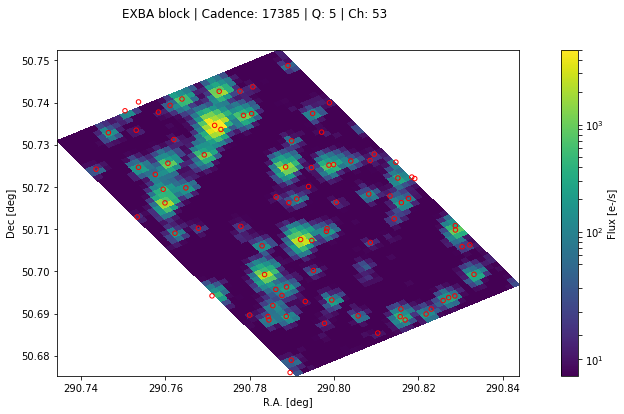

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))
fig.suptitle('EXBA block | Cadence: %i | Q: %i | Ch: %i' % (tpfs[0].cadenceno[1000],
                                                            tpfs[0].get_header()["QUARTER"],
                                                            tpfs[0].get_header()["CHANNEL"]))
pc = ax.pcolormesh(ra, dec, flux[1000], shading='auto',
                   norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=5000, base=10))
ax.scatter(sources.ra, sources.dec, s=20, facecolors='none', 
           marker='o', edgecolors='r', label='Gaia results')
ax.set_xlabel('R.A. [deg]')
ax.set_ylabel('Dec [deg]')
fig.colorbar(pc, label='Flux [e-/s]')
ax.set_aspect('equal', adjustable='box')
plt.show()

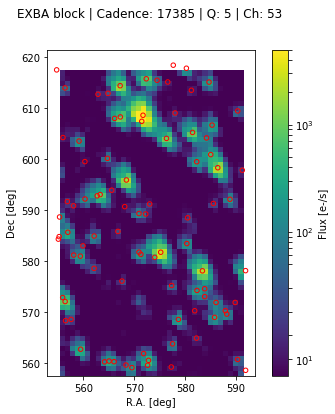

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
fig.suptitle('EXBA block | Cadence: %i | Q: %i | Ch: %i' % (tpfs[0].cadenceno[1000],
                                                            tpfs[0].get_header()["QUARTER"],
                                                            tpfs[0].get_header()["CHANNEL"]))
pc = ax.pcolormesh(col, row, flux[1000], shading='auto',
                   norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=5000, base=10))
ax.scatter(sources.col, sources.row, s=20, facecolors='none', 
           marker='o', edgecolors='r', label='Gaia results')
ax.set_xlabel('R.A. [deg]')
ax.set_ylabel('Dec [deg]')
fig.colorbar(pc, label='Flux [e-/s]')
ax.set_aspect('equal', adjustable='box')
plt.show()

## Aperture Photometry

In [33]:
def dummy_sap(ra, dec, flux, flux_err, sources, space='world'):
    if space == 'world':
        aper = (u.arcsecond * 2 * 4).to(u.deg).value # aperture radii in deg
        aperture_mask = [np.hypot(ra - s.ra, dec - s.dec) < aper for _, s in sources.iterrows()]
    elif space == 'pix-cir':
        aper = 1.7
        aperture_mask = [np.hypot(ra - s.col, dec - s.row) < aper for _, s in sources.iterrows()]
    elif space == 'pix-sq':
        aper = [1.5, 1.5]
        aperture_mask = [(np.abs(ra - np.floor(s.col)) < aper[1]) & 
                         (np.abs(dec - np.floor(s.row)) < aper[0]) for _, s in sources.iterrows()]
    
    sap = np.zeros((sources.shape[0], flux.shape[0]))
    sap_e = np.zeros((sources.shape[0], flux.shape[0]))
    
    for tdx in tqdm(range(len(flux)), desc='Simple SAP flux'):
        sap[:, tdx] = [flux[tdx][mask].sum() for mask in aperture_mask]
        sap_e[:, tdx] = [np.power(flux_err[tdx][mask], 2).sum() ** 0.5 for mask in aperture_mask]
        
    return sap, sap_e, np.asarray(aperture_mask)

In [158]:
ap_mask.shape, flux.shape

((91, 60, 36), (4492, 60, 36))

In [34]:
sap, sap_err, ap_mask = dummy_sap(col, row, 
                                  flux.value, flux_err.value, sources, space='pix-sq')

exba_lcs = [lk.LightCurve(time=times, flux=sap[i], flux_err=sap_err[i], 
                          time_format='bkjd', flux_unit='electron/s', 
                          targetid=sources.designation[i]).remove_outliers(sigma=3) for i in range(len(sap))]

Simple SAP flux:   0%|          | 0/4492 [00:00<?, ?it/s]

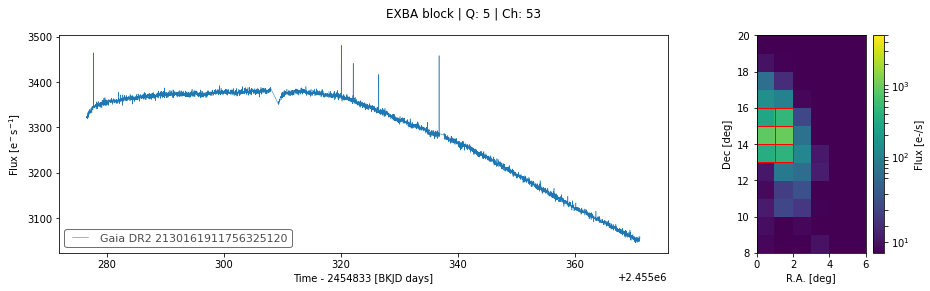

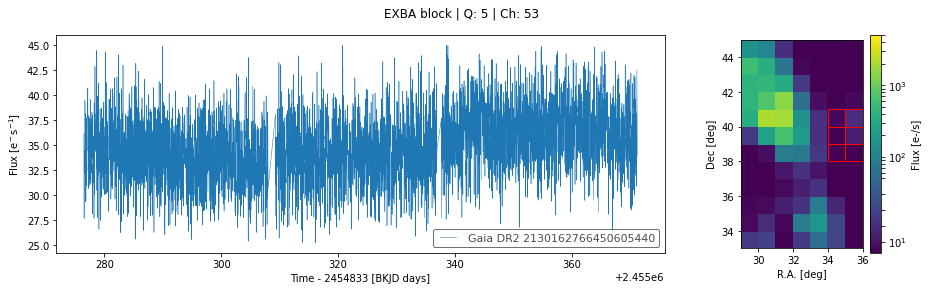

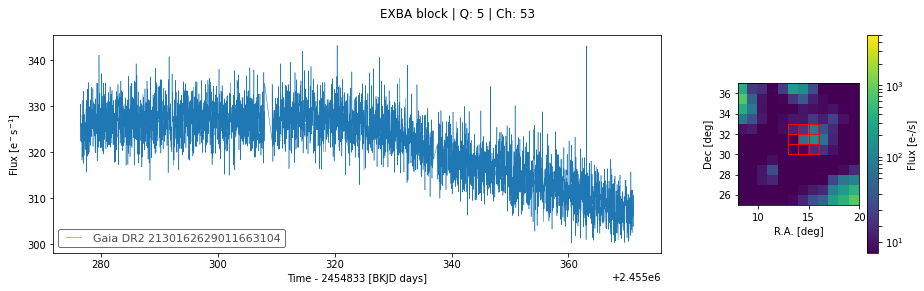

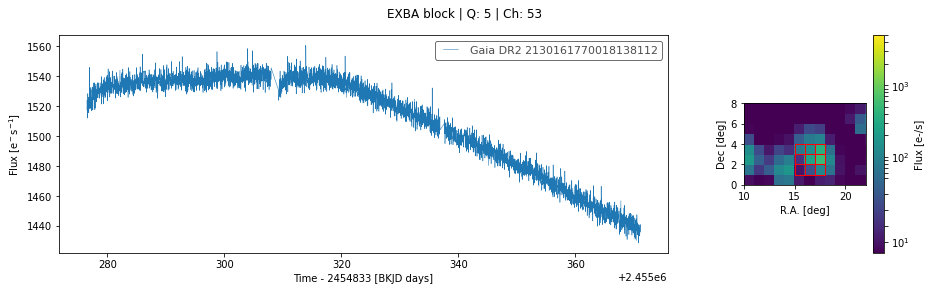

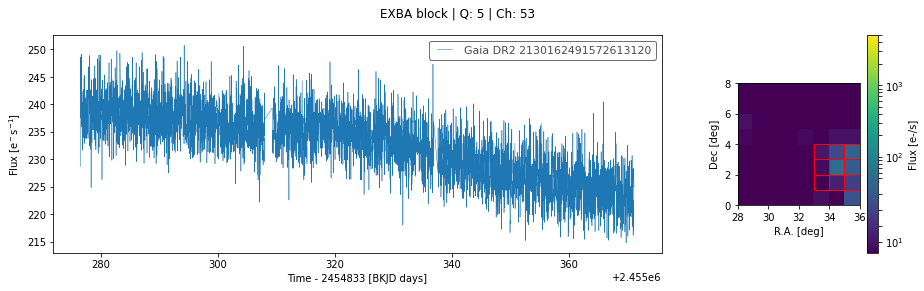

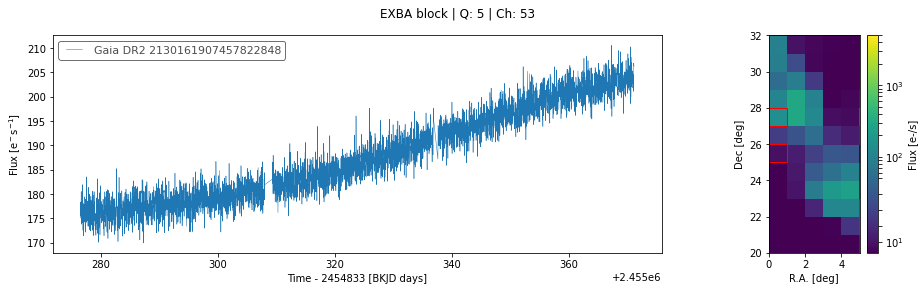

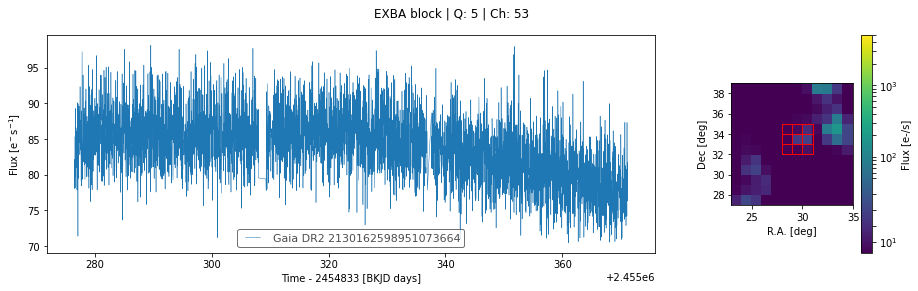

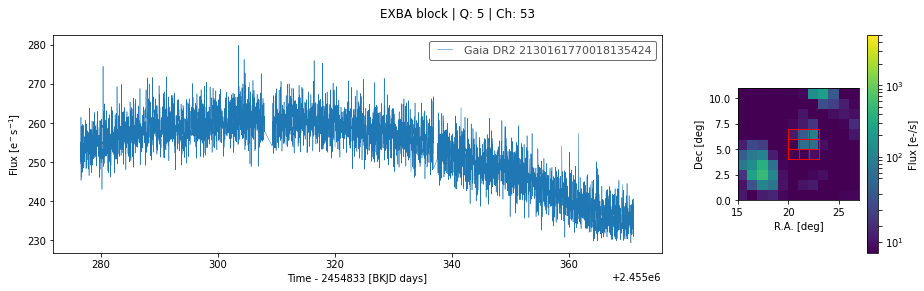

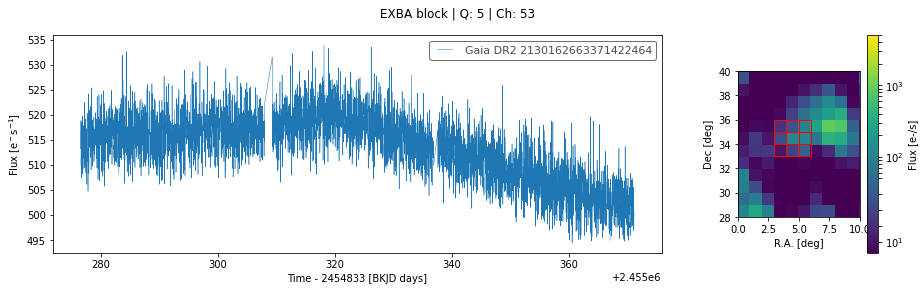

In [35]:
for s in range(0, len(sources), 10):
    if ap_mask[s].sum() == 0: continue
    fig, ax = plt.subplots(1, 2, figsize=(15,4), gridspec_kw={'width_ratios': [4, 1]})

    #ax[0].errorbar(times, sap[s], yerr=sap_err[s], label=sources.designation[s])
    #ax[0].legend(loc='upper right')
    #ax[0].set_xlabel('Time [mjd]')
    #ax[0].set_ylabel('Flux [e-/s]')
    exba_lcs[s].plot(label=exba_lcs[s].targetid, ax=ax[0])

    fig.suptitle('EXBA block | Q: %i | Ch: %i' % (tpfs[0].get_header()["QUARTER"],
                                                  tpfs[0].get_header()["CHANNEL"]))
    pc = ax[1].pcolor(flux[1000], shading='auto',
                       norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=5000, base=10))
    ax[1].scatter(sources.col[s], sources.row[s], s=50, facecolors='none', 
               marker='o', edgecolors='r')
    ax[1].set_xlabel('R.A. [deg]')
    ax[1].set_ylabel('Dec [deg]')
    fig.colorbar(pc, label='Flux [e-/s]')
    ax[1].set_aspect('equal', adjustable='box')

    for i in range(ra.shape[0]):
        for j in range(ra.shape[1]):
            if ap_mask[s, i, j]:
                rect = patches.Rectangle(
                                xy=(j, i),
                                width=1, height=1, color='red',
                                fill=False, hatch='')
                ax[1].add_patch(rect)
    zoom = np.argwhere(ap_mask[s] == True)
    ax[1].set_ylim(np.maximum(0, zoom[0,0] - 5), np.minimum(zoom[-1,0] + 5, ra.shape[0]))
    ax[1].set_xlim(np.maximum(0, zoom[0,-1] - 5), np.minimum(zoom[-1,-1] + 5, ra.shape[1]))

    plt.show()

In [187]:
rect.xy

(5, 35)

# Check lightcurves against SAP_FLUX from near TPFs

In [36]:
near_paths = np.sort(glob.glob(f'{path}/data/near/KIC_*.fits'))
near_tpfs = lk.TargetPixelFileCollection([lk.KeplerTargetPixelFile(f) for f in near_paths])

In [37]:
near_psfm = Machine.from_TPFs(near_tpfs)

/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/machine.py:787: LightkurveDeprecationWarning: The astropy_time function is deprecated and may be removed in a future version.
        Use time instead.
  


INFO: Query finished. [astroquery.utils.tap.core]
(1251, 98)


/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


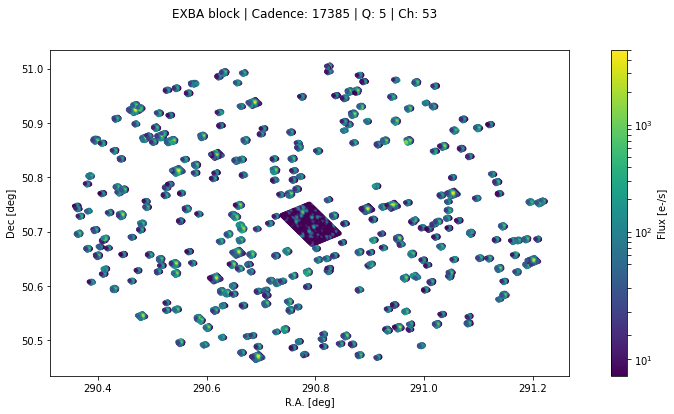

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))
fig.suptitle('EXBA block | Cadence: %i | Q: %i | Ch: %i' % (tpfs[0].cadenceno[1000],
                                                            tpfs[0].get_header()["QUARTER"],
                                                            tpfs[0].get_header()["CHANNEL"]))
ax.scatter(near_psfm.ra, near_psfm.dec, c=near_psfm.flux[0], marker='o', s=10, cmap='viridis',
           norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=50000, base=10))
ax.set_xlabel('R.A. [deg]')
ax.set_ylabel('Dec [deg]')
fig.colorbar(pc, label='Flux [e-/s]')
ax.set_aspect('equal', adjustable='box')
plt.show()

In [39]:
near_lcs = [tpf.to_lightcurve(method='aperture').remove_outliers(sigma=3) for tpf in near_tpfs]

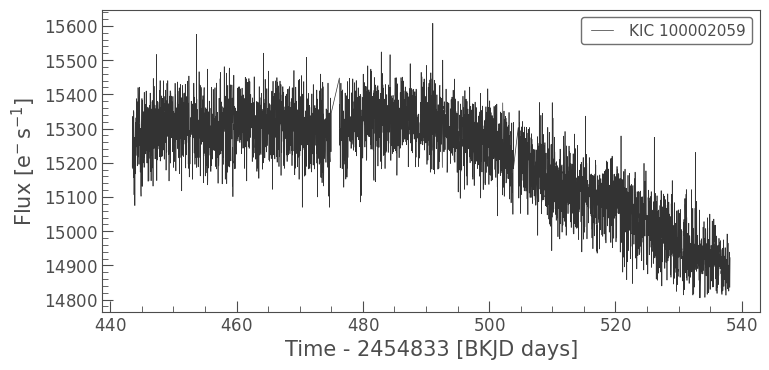

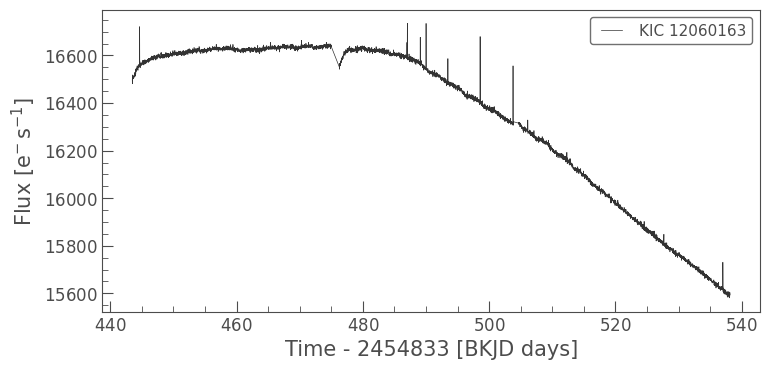

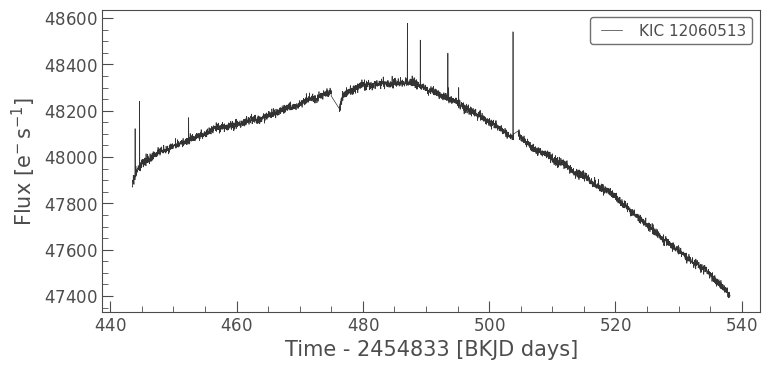

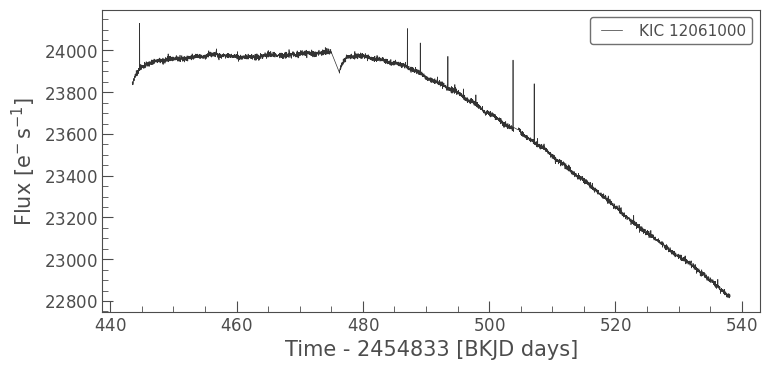

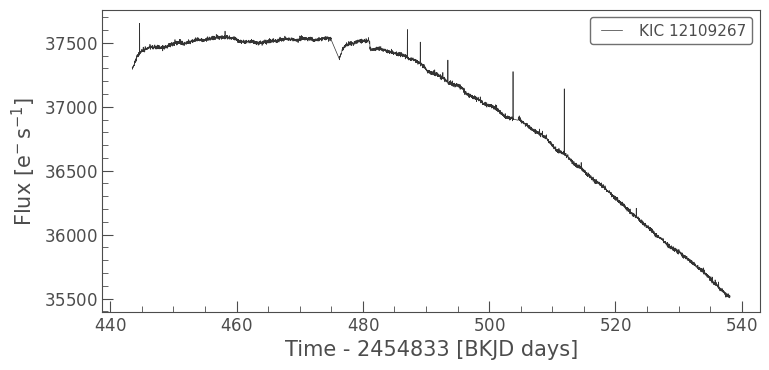

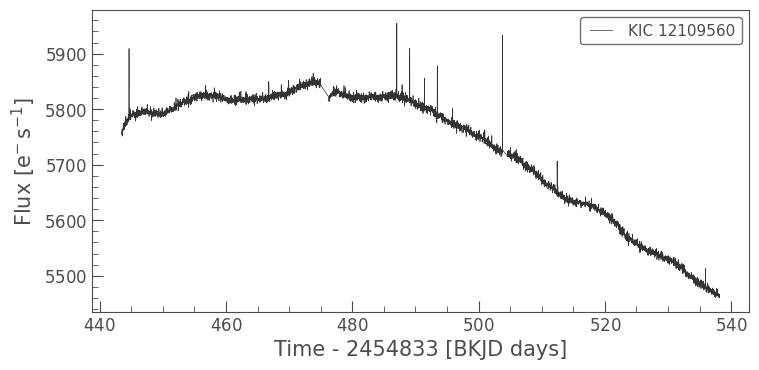

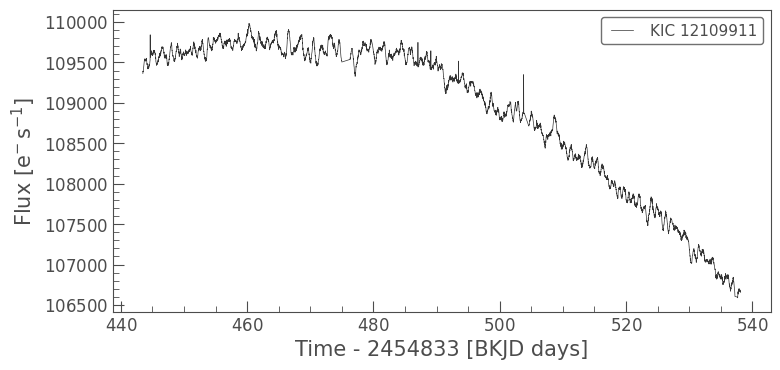

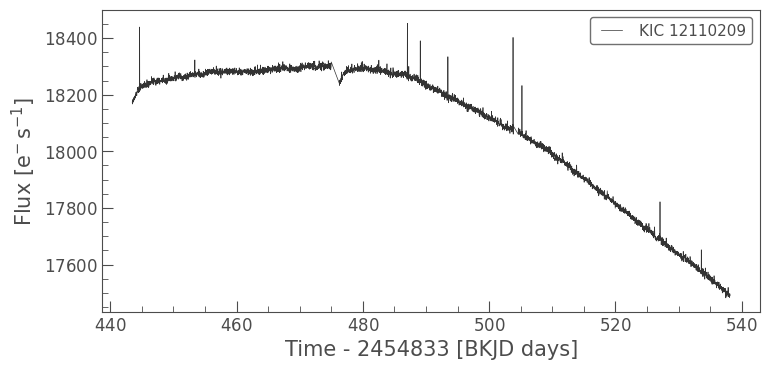

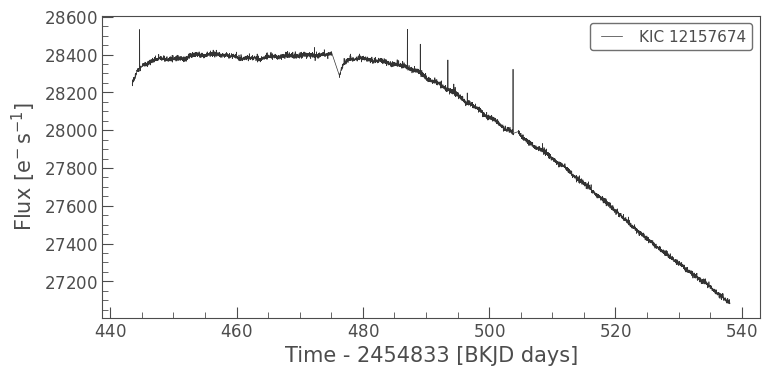

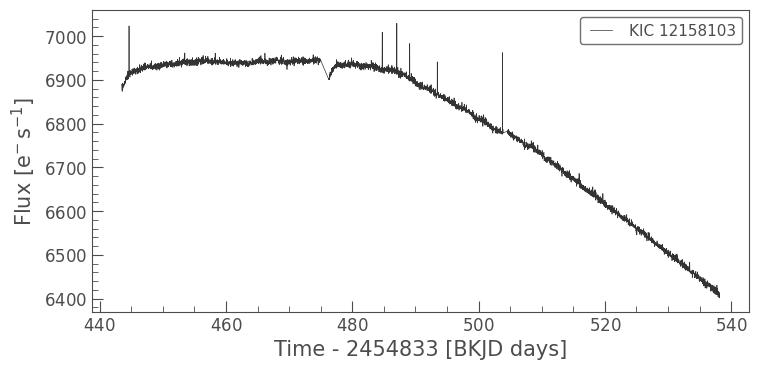

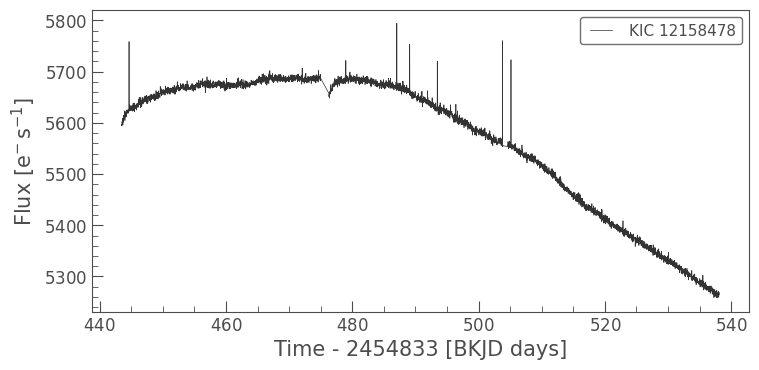

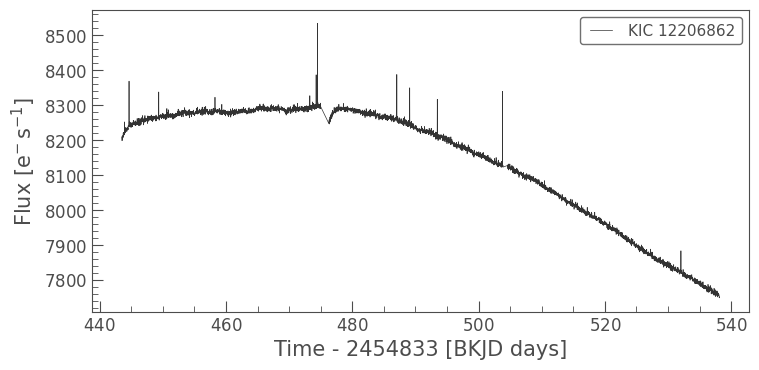

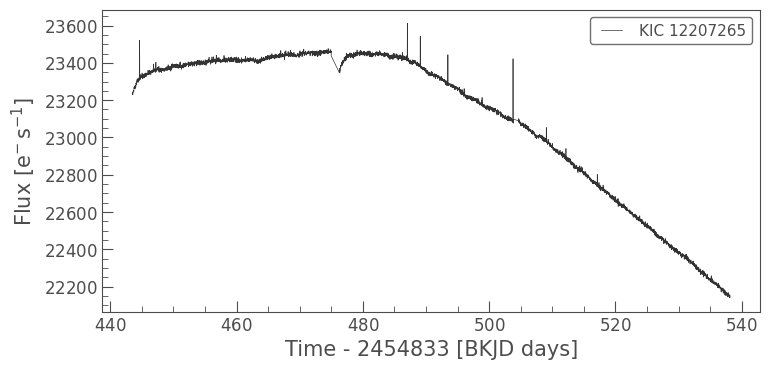

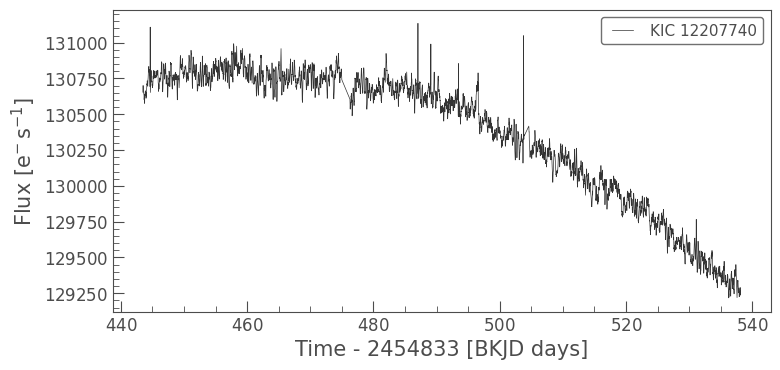

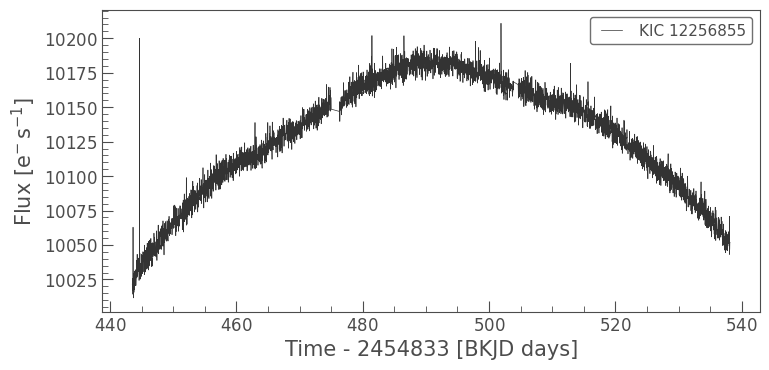

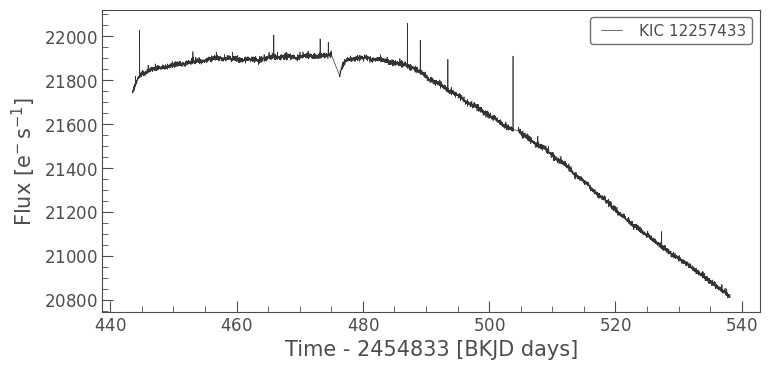

In [40]:
for lc in near_lcs[::20]:
    lc.plot()
    plt.show()

In [41]:
def median_trend(lcs):
    near_trends = [lc.normalize().flatten(window_length=201, return_trend=True)[1].bin(time_bin_size=1, n_bins=83) for lc in lcs]
    trend_flux = np.array([t.flux for t in near_trends])
    plt.plot(np.median(trend_flux, axis=0))
    plt.show()
    
    return

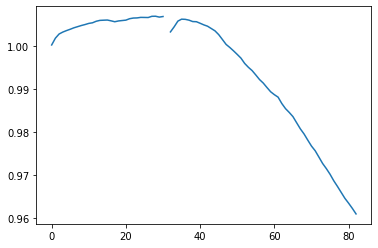

In [42]:
median_trend(near_lcs)

/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:813: LightkurveWarning: The light curve appears to be zero-centered (median=-5.63e-01 electron / s +/- 1.97e+00 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn("The light curve appears to be zero-centered "
/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/lightkurve/lightcurve.py:822: LightkurveWarning: The light curve has a negative median flux (-5.63e-01 electron / s); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn("The light curve has a negative median flux ({:.2e});"


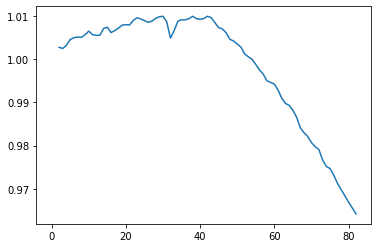

In [43]:
median_trend(exba_lcs[1:])

### Use my simple ApP for near TPFs

# Adaptive Aperture

In [230]:
def adaptive_aperture(col, row, flux, sources, flux_enclose=.9, radius_limit=12):
    dx, dy, gf = np.asarray([np.vstack([row - sources['col'][idx], 
                                        row - sources['row'][idx], 
                                        np.zeros(len(row)) + sources.phot_g_mean_flux[idx]])
                             for idx in range(len(sources))]).transpose([1, 0, 2])

    radii = np.hypot(dx, dy)
    mean_flux = np.nanmean(flux, axis=0)
    
    mask = (radii < radius_limit)
    mask &= (mask.sum(axis=0) == 1)
    
    f = np.log10((mask.astype(float) * mean_flux))
    A = np.vstack([radii[mask]**0, radii[mask], np.log10(gf[mask])]).T
    k = np.isfinite(f[mask])
    sigma_w_inv = A[k].T.dot(A[k])
    B = A[k].T.dot(f[mask][k])
    w = np.linalg.solve(sigma_w_inv, B)
    
    test_gaia = np.linspace(np.log10(gf.min()), np.log10(gf.max()), 100)
    test_r = np.arange(1, 10, 0.25)
    radius_check = np.asarray([np.vstack([[(np.ones(100) * v) ** idx for idx in range(2)], 
                                          test_gaia]).T.dot(w) for v in test_r])

    cut = np.percentile(np.abs(radius_check - 1), 3) - np.min(np.abs(radius_check - 1))
    x, y = np.asarray(np.meshgrid(test_gaia, test_r))[:, np.abs(radius_check - 1) < cut]

    radius = np.polyval(np.polyfit(x, y, 5), np.log10(sources['phot_g_mean_flux']))
    #radius[np.log10(sources['phot_g_mean_flux']) < 3] = 2
    #radius[np.log10(sources['phot_g_mean_flux']) > 6.5] = 6
    radius = np.ceil(radius)

    radius_mask = (radii < radius[:, None])
    print(radii)
    print(radius)
    return radius_mask


In [231]:
flux_f = flux.reshape(flux.shape[0], np.product(flux.shape[1:])).value
flux_err_f = flux.reshape(flux_err.shape[0], np.product(flux_err.shape[1:])).value
row_f = row.ravel()
col_f = col.ravel()

In [232]:
radius_mask = adaptive_aperture(col_f, row_f, flux_f, sources)

[[59.64473844 59.64473844 59.64473844 ... 62.22969469 62.22969469
  62.22969469]
 [23.02810724 23.02810724 23.02810724 ... 67.91312813 67.91312813
  67.91312813]
 [54.88017104 54.88017104 54.88017104 ... 39.77041798 39.77041798
  39.77041798]
 ...
 [57.20302143 57.20302143 57.20302143 ... 49.82732878 49.82732878
  49.82732878]
 [23.22706285 23.22706285 23.22706285 ... 61.75729136 61.75729136
  61.75729136]
 [34.29632898 34.29632898 34.29632898 ... 61.83922834 61.83922834
  61.83922834]]
[  15.   14.   11.   -0.   15.  -37.   12.   13.   15.   10.   -0.   10.
   12.   12.   11.   12.   10.   11.   15.   10.   12.   12.   14.   10.
   12.   15.   15.   15.   14.   11.   15.   15.   14.   15.   13.   11.
   11.    3.   14.   12.   10.   13.  -19.   15.   15.   10.   11.   14.
   12.   10.   14.   11.   15.   10.   11.   10.   10.   15.   11.   10.
   12.   14.   15.   -2.   10.   14.   10.   15.    4.  -19.   12.   15.
   12.   14.  -22.   14.   12.   10.   15.   15.   15.   14.   15. -12

<ipython-input-230-236c05734a46>:13: RuntimeWarning: divide by zero encountered in log10
  f = np.log10((mask.astype(float) * mean_flux))
<ipython-input-230-236c05734a46>:13: RuntimeWarning: invalid value encountered in log10
  f = np.log10((mask.astype(float) * mean_flux))
<ipython-input-232-b54c5ce2a98b>:1: RankWarning: Polyfit may be poorly conditioned
  radius_mask = adaptive_aperture(col_f, row_f, flux_f, sources)


In [237]:
c._get_source_mask()
c.radius/4

array([ 8.7842211 ,  9.76784028, 12.82298805,  8.45117314,  9.76918184,
        9.12313273,  8.28901041,  8.43633152,  8.37858258,  6.97642622,
        7.98186871,  8.16003668,  7.21017066,  8.38706011,  6.65520329,
        9.68314705,  7.22964781,  9.35872001,  6.7053206 , 10.68373167,
        7.79800915,  7.96599877,  7.222335  ,  9.32326234,  8.34041255,
        8.44164873,  8.60509835,  9.82363991,  8.48627828,  7.97726367,
       10.67335828,  8.11647684,  8.70260562, 10.961587  ,  7.02140602,
        9.35387702,  7.68582052,  7.37946411,  7.71846088,  8.70911784,
        7.76736068, 41.50020509,  6.7878103 ,  9.71036965,  8.83976794,
        9.81773407, 10.26571534,  8.74060667,  8.17691197])

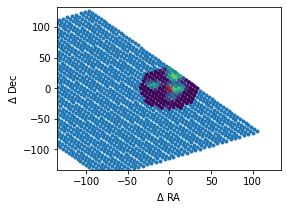

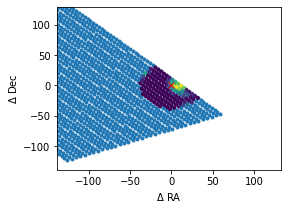

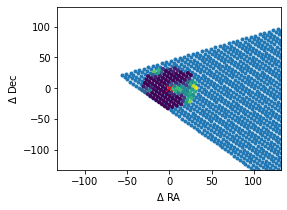

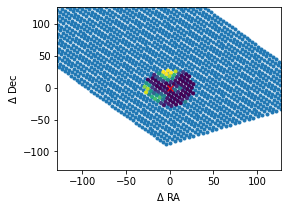

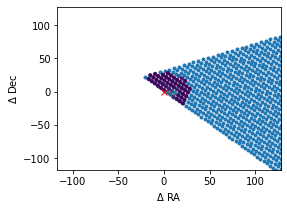

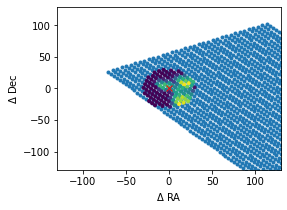

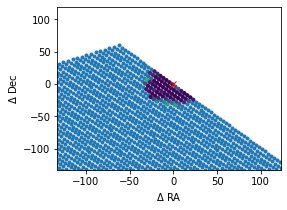

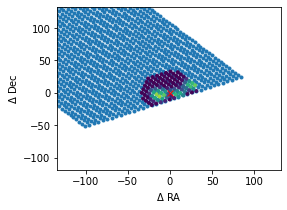

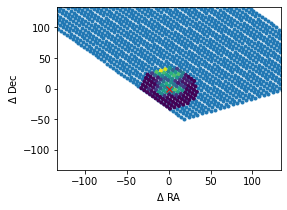

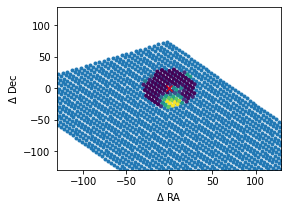

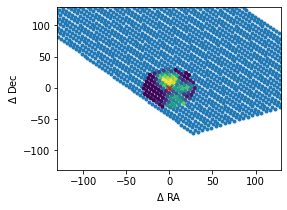

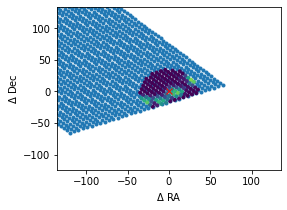

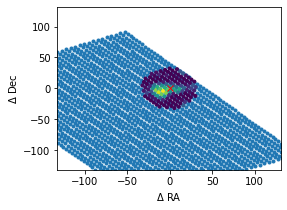

In [238]:
aux_mask = c.source_mask.toarray()
for ii in range(0, len(c.sources), 4):
    plt.figure(figsize=(4,3))
    x = c.dra[ii].to('arcsec').value
    y = c.ddec[ii].to('arcsec').value
    plt.scatter(x, y, marker='.')
    plt.scatter(x[aux_mask[ii]], 
                y[aux_mask[ii]], 
                c=c.flux[0, aux_mask[ii]], marker='.',
               norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=1000, base=10))
    plt.xlim(x[aux_mask[ii]].min()-100, x[aux_mask[ii]].max()+100)
    plt.ylim(y[aux_mask[ii]].min()-100, y[aux_mask[ii]].max()+100)
    plt.plot(0,0, 'rx')
    plt.xlabel(r'$\Delta$ RA')
    plt.ylabel(r'$\Delta$ Dec')
    plt.show()
del aux_mask

In [7]:
from psfmachine import Collection

In [8]:
collect = Collection(tpfs)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]


/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/collection.py:332: RuntimeWarning: divide by zero encountered in log10
  f = np.log10((temp_mask.astype(float) * mean_flux))
/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/collection.py:332: RuntimeWarning: invalid value encountered in log10
  f = np.log10((temp_mask.astype(float) * mean_flux))
/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/collection.py:397: RuntimeWarning: invalid value encountered in log10
  f = np.log10(
/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/collection.py:426: RuntimeWarning: Mean of empty slice
  ar[idx, jdx] = np.nanmean(f[m])
/Users/jorgemarpa/.pyenv/versions/adap/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Fitting PSF model:   0%|          | 0/4492 [00:00<?, ?it/s]

Simple SAP flux:   0%|          | 0/4492 [00:00<?, ?it/s]

In [9]:
collect._find_PSF_edge(radius_limit=6)
collect.radius

/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/collection.py:332: RuntimeWarning: divide by zero encountered in log10
  f = np.log10((temp_mask.astype(float) * mean_flux))
/Users/jorgemarpa/Work/BAERI/ADAP/psfmachine/psfmachine/collection.py:332: RuntimeWarning: invalid value encountered in log10
  f = np.log10((temp_mask.astype(float) * mean_flux))


array([6., 6., 6., 6., 6., 5., 6., 6., 5., 6., 5., 6., 6., 6., 6.])

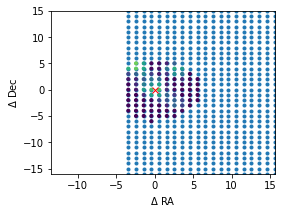

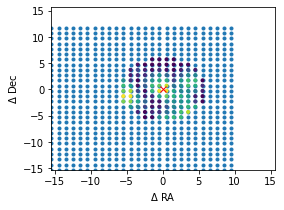

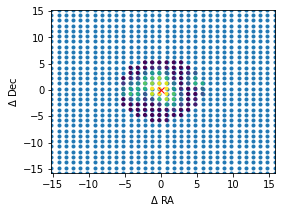

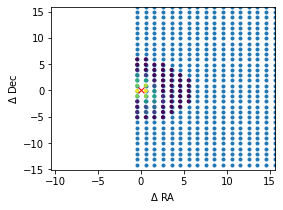

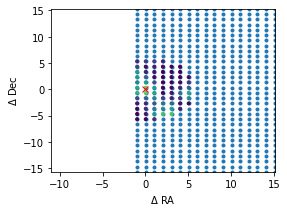

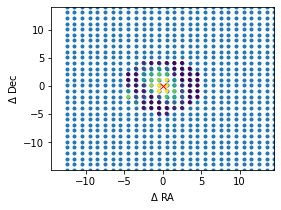

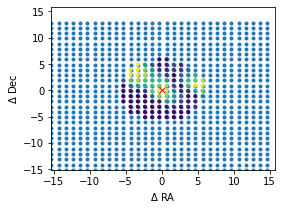

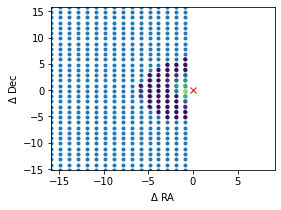

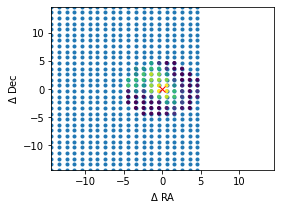

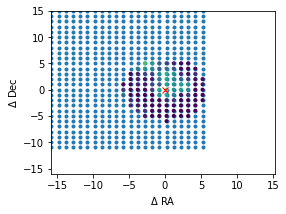

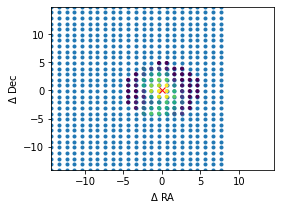

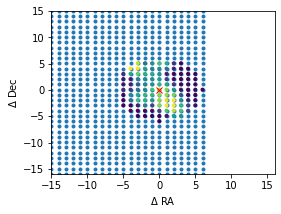

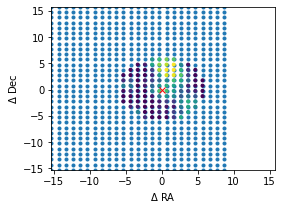

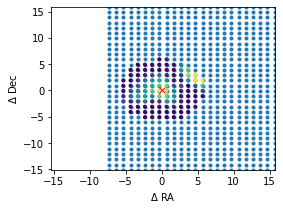

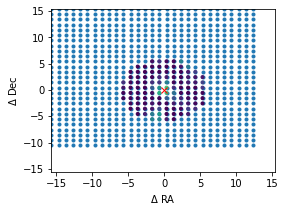

In [32]:
aux_mask = collect.mask
for ii in range(0, len(collect.sources)):
    plt.figure(figsize=(4,3))
    x = collect.dx[ii]
    y = collect.dy[ii]
    plt.scatter(x, y, marker='.')
    plt.scatter(x[aux_mask[ii]], 
                y[aux_mask[ii]], 
                c=collect.flux[0, aux_mask[ii]], marker='.',
               norm=colors.SymLogNorm(linthresh=50, vmin=3, vmax=1000, base=10))
    plt.xlim(x[aux_mask[ii]].min()-10, x[aux_mask[ii]].max()+10)
    plt.ylim(y[aux_mask[ii]].min()-10, y[aux_mask[ii]].max()+10)
    plt.plot(0,0, 'rx')
    plt.xlabel(r'$\Delta$ RA')
    plt.ylabel(r'$\Delta$ Dec')
    plt.show()
del aux_mask